In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import os
os.environ["OMP_NUM_THREADS"] = '1'
import warnings
warnings.filterwarnings('ignore')

In [2]:
X,y =make_blobs(n_samples=100,centers=3,shuffle=False, random_state=42)

-171.9109845905773

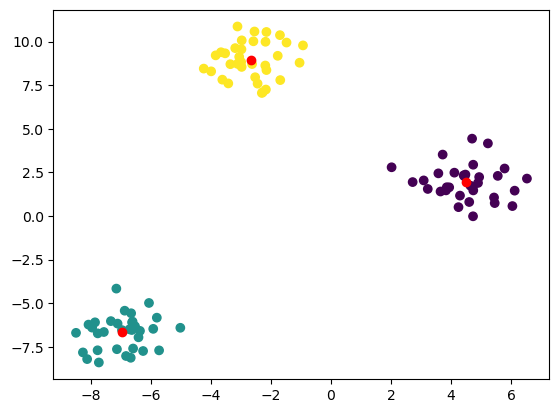

In [3]:
model =KMeans(n_clusters=3,n_init='auto')
model.fit(X)
model.predict(X)
plt.scatter(X[:,0],X[:,1],c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],c='r')
model.inertia_
model.score(X)

Text(0, 0.5, 'Cout du model(Inertia)')

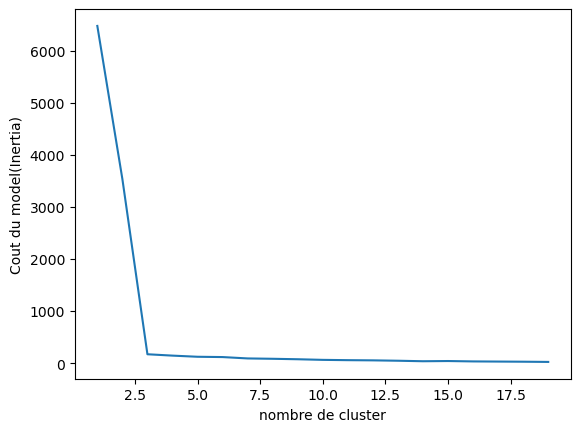

In [4]:
inertia=[]
k_range =range(1,20)

for k in k_range:
    model =KMeans(n_clusters=k,n_init='auto').fit(X)
    inertia.append(model.inertia_)
    
plt.plot(k_range,inertia)
plt.xlabel('nombre de cluster')
plt.ylabel('Cout du model(Inertia)')

In [5]:
### Detection d'anomalies
##Algorithme Isolation Forest point fort analyse de grand dataset
X,y =make_blobs(n_samples=50,centers=1,shuffle=False, random_state=42)
X[-1,:] =np.array([2.25,5]) 

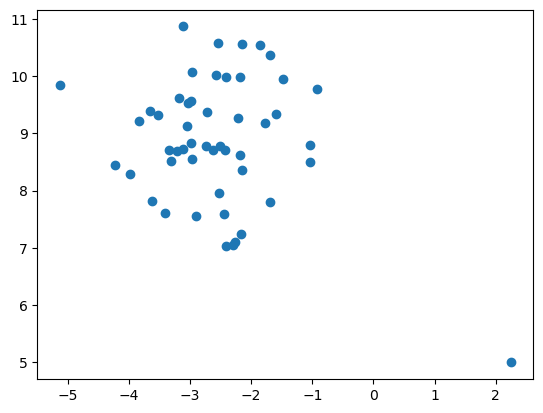

In [6]:
plt.scatter(X[:,0],X[:,1])

In [7]:
from sklearn.ensemble import IsolationForest

In [8]:
## identification dechet dans le model
model =IsolationForest(contamination=0.01)
model.fit(X)

IsolationForest(contamination=0.01)

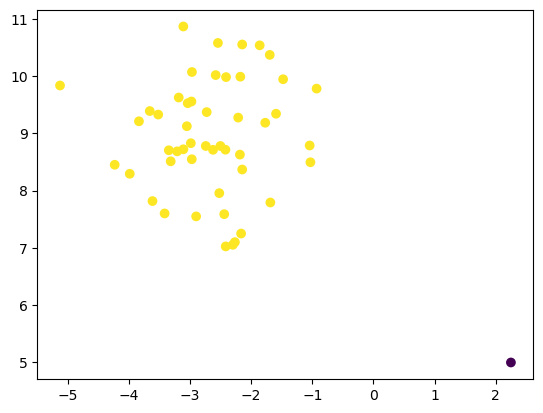

In [9]:
plt.scatter(X[:,0],X[:,1],c=model.predict(X))

###  Dataset Digits

In [10]:
from sklearn.datasets import load_digits

In [11]:
digits =load_digits()
images =digits.images
X =digits.data
y=digits.target

print(X.shape)

(1797, 64)


In [12]:
model =IsolationForest(random_state=0,contamination=0.02)

In [13]:
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [14]:
## Boolean indexing
outliers =model.predict(X)==-1

In [15]:

outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '2')

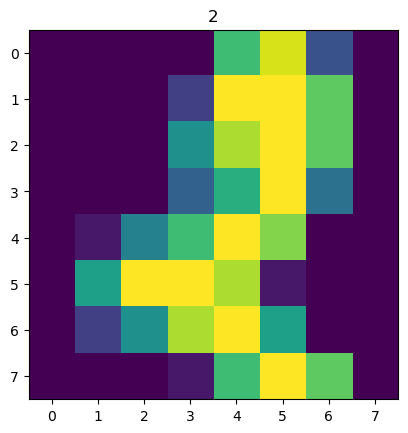

In [16]:
plt.imshow(images[outliers][0])
plt.title(y[outliers][0])

In [17]:
### Local Outlier Factor
## Novelty Detection

#### La Reduction de Dimension

In [18]:
### Analyse en Composantes Principales

from sklearn.decomposition import PCA

In [19]:
model =PCA(n_components=2)
X_reduced =model.fit_transform(X)

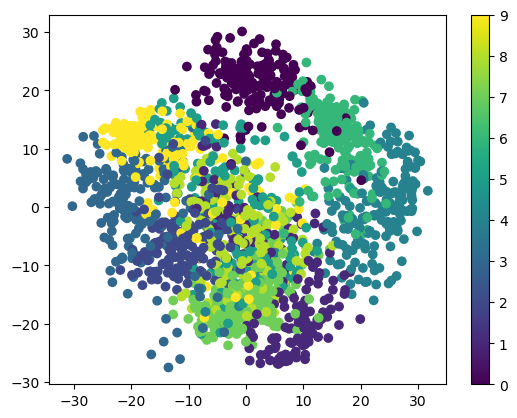

In [20]:
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)
plt.colorbar()

In [21]:
model =PCA(n_components=64)
X_reduced =model.fit_transform(X)

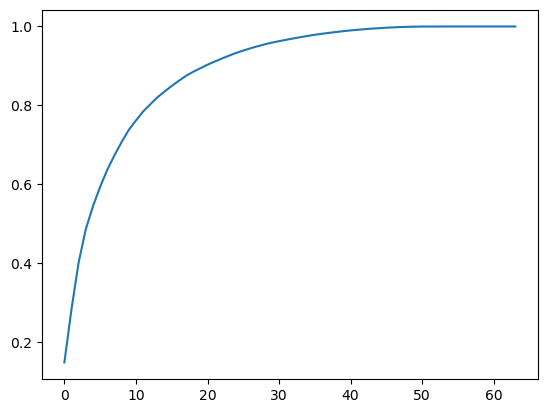

In [22]:
plt.plot(np.cumsum(model.explained_variance_ratio_))

In [23]:
np.argmax(np.cumsum(model.explained_variance_ratio_))

60

In [24]:
model =PCA(n_components=0.95)
X_reduced =model.fit_transform(X)

In [25]:
X_recovered =model.inverse_transform(X_reduced)

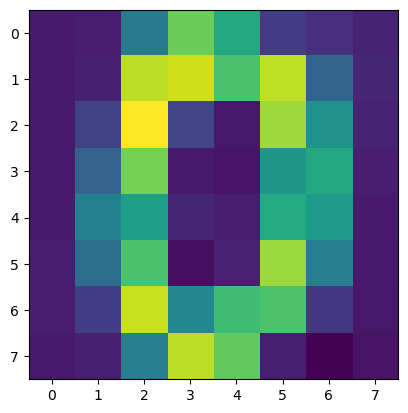

In [26]:
plt.imshow(X_recovered[0].reshape((8,8)))

#### Visualisation de donnee

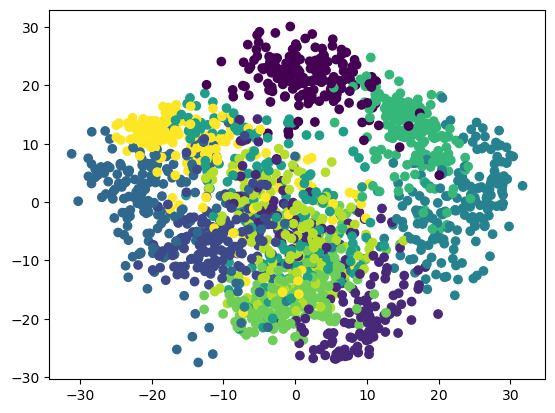

In [27]:

plt.scatter(X_reduced[:,0],X_reduced[:,1],c=y)


#### Compression de donnee

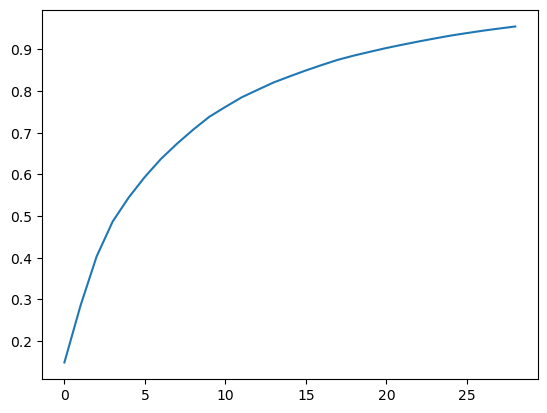

In [28]:
plt.plot(np.cumsum(model.explained_variance_ratio_))